In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [2]:
df_cust = pd.read_csv('data/CustomerRetention.csv')

df_cust.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_cust.shape

(7043, 21)

In [4]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [234]:
df_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [235]:
df_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [236]:
df_cust.isnull().sum()[df_cust.isnull().sum()>0]

Series([], dtype: int64)

In [237]:
df_cust.duplicated().sum()

0

In [238]:
df_cust.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [239]:
#df_cust['TotalCharges'].replace(to_replace = np.nan,value = np.nan,inplace = True)

df_cust['TotalCharges'] = pd.to_numeric(df_cust['TotalCharges'], errors='coerce')

# Check how many NaN values exist now
num_nan = df_cust['TotalCharges'].isna().sum()

df_cust = df_cust.dropna(subset=['TotalCharges'])

In [240]:
df_cust['SeniorCitizen'] = df_cust['SeniorCitizen'].astype(object)
df_cust['TotalCharges'] = df_cust['TotalCharges'].astype(float)

In [241]:
df_cust.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [242]:
print("No of unique values in gender column")
print(df_cust['gender'].unique())

print("No of unique values in SeniorCitizen column")
print(df_cust['SeniorCitizen'].unique())

print("No of unique values in Partner column")
print(df_cust['Partner'].unique())

print("No of unique values in Dependents column")
print(df_cust['Dependents'].unique())

print("No of unique values in PhoneService column")
print(df_cust['PhoneService'].unique())

print("No of unique values in MultipleLines column")
print(df_cust['MultipleLines'].unique())

print("No of unique values in InternetService column")
print(df_cust['InternetService'].unique())

print("No of unique values in OnlineSecurity column")
print(df_cust['OnlineSecurity'].unique())

print("No of unique values in OnlineBackup column")
print(df_cust['OnlineBackup'].unique())

print("No of unique values in DeviceProtection column")
print(df_cust['DeviceProtection'].unique())

print("No of unique values in TechSupport column")
print(df_cust['TechSupport'].unique())

print("No of unique values in StreamingTV column")
print(df_cust['StreamingTV'].unique())

print("No of unique values in StreamingMovies column")
print(df_cust['StreamingMovies'].unique())

print("No of unique values in Contract column")
print(df_cust['Contract'].unique())

print("No of unique values in PaperlessBilling column")
print(df_cust['PaperlessBilling'].unique())

print("No of unique values in PaymentMethod column")
print(df_cust['PaymentMethod'].unique())

print("No of unique values in Churn column")
print(df_cust['Churn'].unique())

No of unique values in gender column
['Female' 'Male']
No of unique values in SeniorCitizen column
[0 1]
No of unique values in Partner column
['Yes' 'No']
No of unique values in Dependents column
['No' 'Yes']
No of unique values in PhoneService column
['No' 'Yes']
No of unique values in MultipleLines column
['No phone service' 'No' 'Yes']
No of unique values in InternetService column
['DSL' 'Fiber optic' 'No']
No of unique values in OnlineSecurity column
['No' 'Yes' 'No internet service']
No of unique values in OnlineBackup column
['Yes' 'No' 'No internet service']
No of unique values in DeviceProtection column
['No' 'Yes' 'No internet service']
No of unique values in TechSupport column
['No' 'Yes' 'No internet service']
No of unique values in StreamingTV column
['No' 'Yes' 'No internet service']
No of unique values in StreamingMovies column
['No' 'Yes' 'No internet service']
No of unique values in Contract column
['Month-to-month' 'One year' 'Two year']
No of unique values in Paperle

In [243]:
numeric_feature = [feature for feature in df_cust.columns if df_cust[feature].dtype != 'O']
categorical_feature = [feature for feature in df_cust.columns if df_cust[feature].dtype == 'O']

print('No of numerical columns {} and they are {}'.format(len(numeric_feature),numeric_feature))
print('\nNo of categorical columns {} and they are {}'.format(len(categorical_feature),categorical_feature))

No of numerical columns 3 and they are ['tenure', 'MonthlyCharges', 'TotalCharges']

No of categorical columns 18 and they are ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [244]:
df_cust = df_cust.drop('customerID',axis=1)

df_cust

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [245]:
#EDA

In [246]:
df_cust['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

By seeing count of customers it is clear that data consists lot of people who churn.Hence it might be slightly biased towards it

<Axes: xlabel='gender', ylabel='Count'>

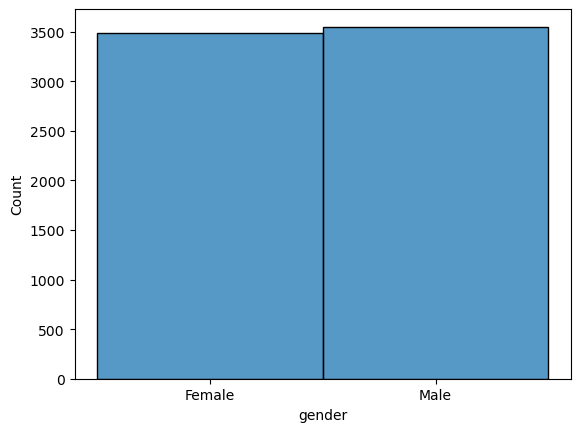

In [247]:
sns.histplot(data=df_cust, x="gender")

In [248]:
df_cust.groupby(['gender','Churn'])['gender','Churn'].value_counts()

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
dtype: int64

<Axes: xlabel='gender', ylabel='Count'>

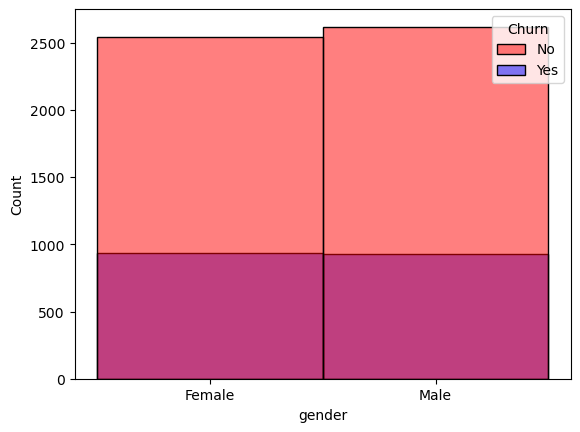

In [249]:
sns.histplot(data=df_cust, x="gender",hue = 'Churn',palette = ['red','blue'])

As seen from above graph. Dataset consists of equal number of males and females. No of customers that churns out or stay within company is same in case of both genders.

<Axes: xlabel='Partner', ylabel='Count'>

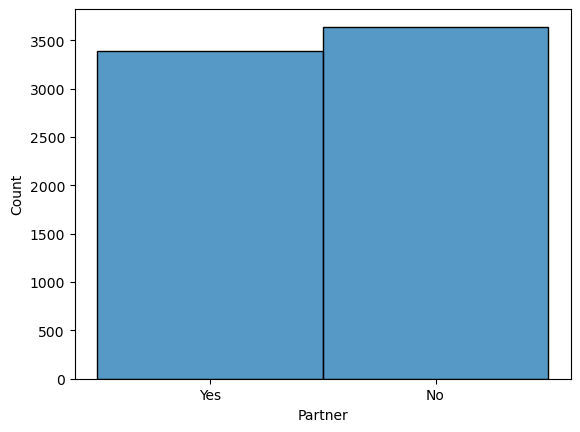

In [250]:
sns.histplot(data=df_cust, x="Partner")

In [251]:
df_cust.groupby(['Partner','Churn'])['Partner','Churn'].value_counts()

Partner  Churn
No       No       2439
         Yes      1200
Yes      No       2724
         Yes       669
dtype: int64

<Axes: xlabel='Partner', ylabel='Count'>

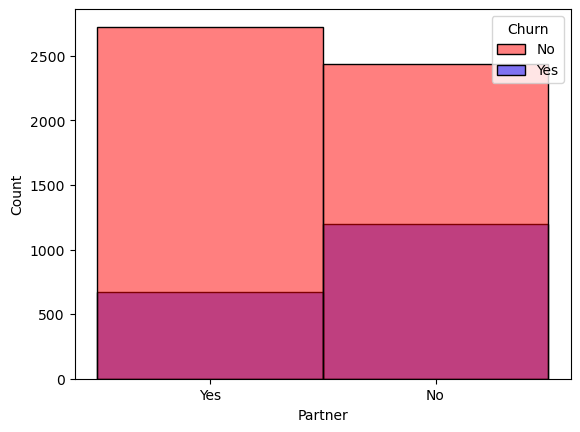

In [252]:
sns.histplot(data=df_cust, x="Partner",hue = 'Churn',palette = ['red','blue'])

As seen from above graph and groupby output. People who dont have partners are likely to churn and has relationship with dependent variable

<Axes: xlabel='Dependents', ylabel='Count'>

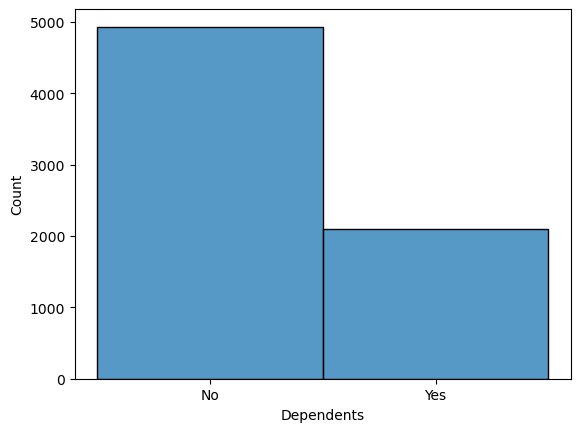

In [253]:
sns.histplot(data=df_cust, x="Dependents")

In [254]:
df_cust.groupby(['Dependents','Churn'])['Dependents','Churn'].value_counts()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1773
            Yes       326
dtype: int64

<Axes: xlabel='Dependents', ylabel='Count'>

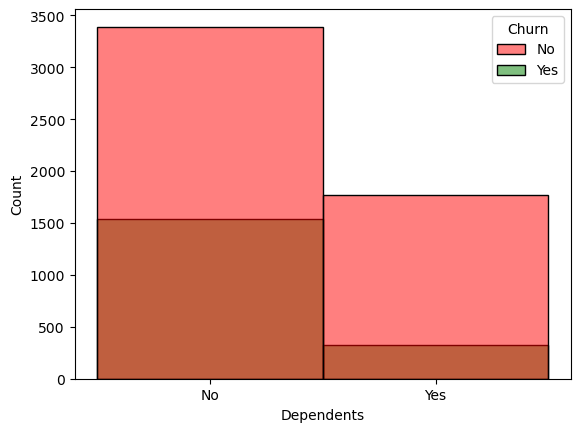

In [255]:
sns.histplot(data=df_cust, x="Dependents",hue = 'Churn',palette = ['red','green'])

As seen from above graph and groupby output. People who dont have dependents are likely to churn when compared to people with dependents

<Axes: xlabel='MultipleLines', ylabel='Count'>

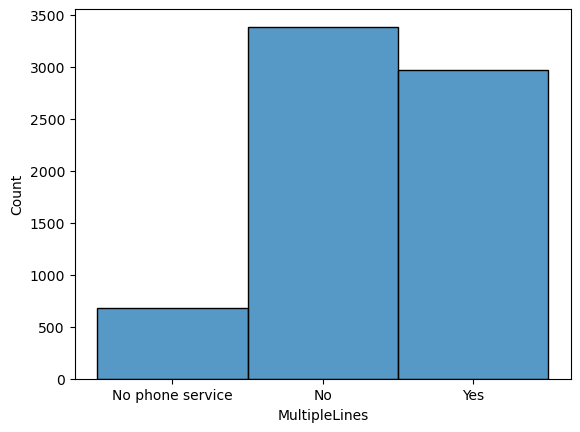

In [256]:
sns.histplot(data=df_cust, x="MultipleLines")

In [257]:
df_cust.groupby(['MultipleLines','Churn'])['MultipleLines','Churn'].value_counts()

MultipleLines     Churn
No                No       2536
                  Yes       849
No phone service  No        510
                  Yes       170
Yes               No       2117
                  Yes       850
dtype: int64

<Axes: xlabel='MultipleLines', ylabel='Count'>

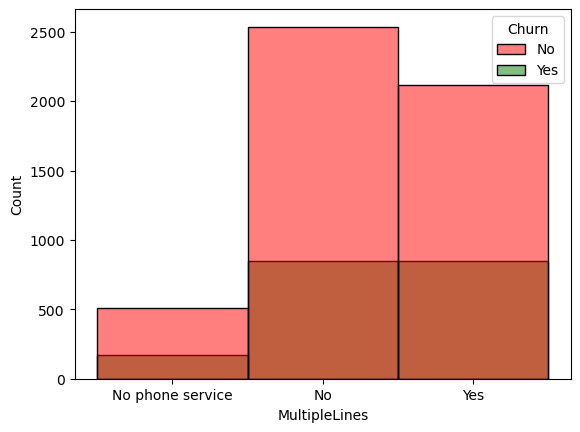

In [258]:
sns.histplot(data=df_cust, x="MultipleLines",hue = 'Churn',palette = ['red','green'])

Multiple lines doesnot have major impact on whether customers churn or not

<Axes: xlabel='InternetService', ylabel='Count'>

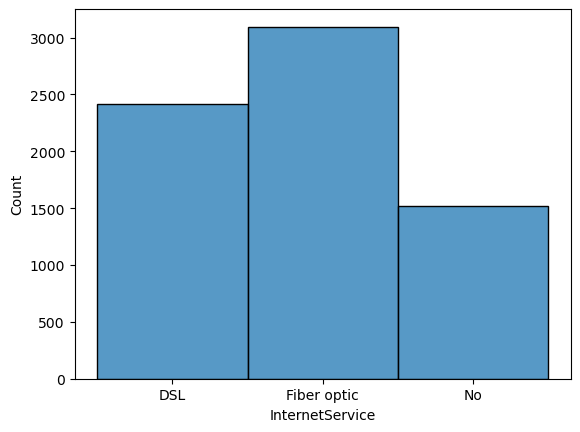

In [259]:
sns.histplot(data=df_cust, x="InternetService")

In [260]:
df_cust.groupby(['InternetService','Churn'])['InternetService','Churn'].value_counts()

InternetService  Churn
DSL              No       1957
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1407
                 Yes       113
dtype: int64

<Axes: xlabel='InternetService', ylabel='Count'>

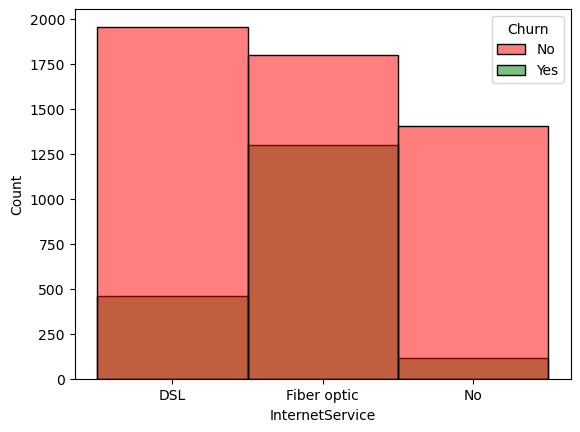

In [261]:
sns.histplot(data=df_cust, x="InternetService",hue = 'Churn',palette = ['red','green'])

As seen from above graph and groupby output. People who have fibre optic service are equally likely to churn.

<Axes: xlabel='OnlineSecurity', ylabel='Count'>

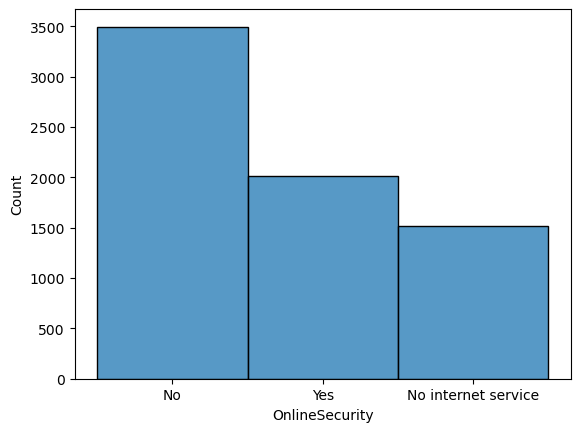

In [262]:
sns.histplot(data=df_cust, x="OnlineSecurity")

In [263]:
df_cust.groupby(['OnlineSecurity','Churn'])['OnlineSecurity','Churn'].value_counts()

OnlineSecurity       Churn
No                   No       2036
                     Yes      1461
No internet service  No       1407
                     Yes       113
Yes                  No       1720
                     Yes       295
dtype: int64

<Axes: xlabel='OnlineSecurity', ylabel='Count'>

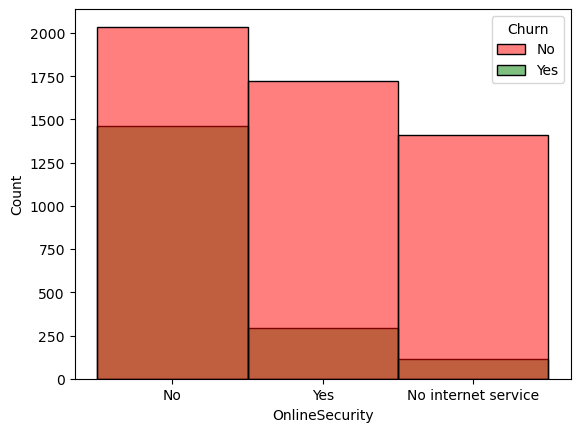

In [264]:
sns.histplot(data=df_cust, x="OnlineSecurity",hue = 'Churn',palette = ['red','green'])

When online security is not present.Customer is likely to churn

<Axes: xlabel='OnlineBackup', ylabel='Count'>

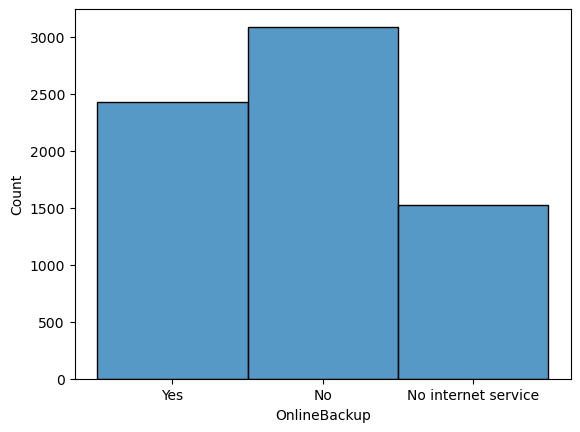

In [265]:
sns.histplot(data=df_cust, x="OnlineBackup")

In [266]:
df_cust.groupby(['OnlineBackup','Churn'])['OnlineBackup','Churn'].value_counts()

OnlineBackup         Churn
No                   No       1854
                     Yes      1233
No internet service  No       1407
                     Yes       113
Yes                  No       1902
                     Yes       523
dtype: int64

<Axes: xlabel='OnlineBackup', ylabel='Count'>

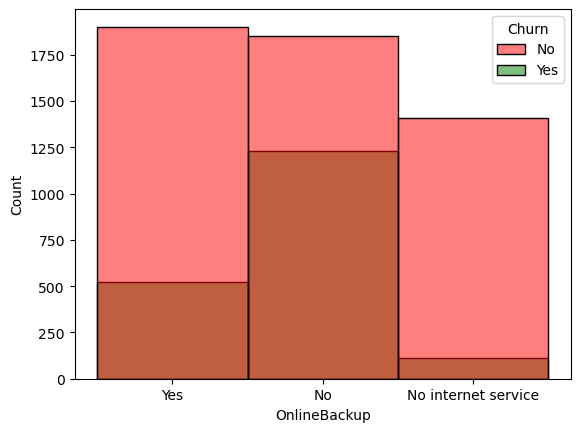

In [267]:
sns.histplot(data=df_cust, x="OnlineBackup",hue = 'Churn',palette = ['red','green'])

When online backup is not present.Customer is likely to churn

<Axes: xlabel='DeviceProtection', ylabel='Count'>

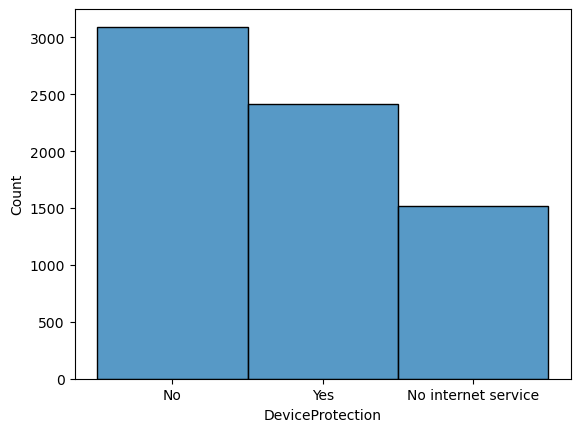

In [268]:
sns.histplot(data=df_cust, x="DeviceProtection")

In [269]:
df_cust.groupby(['DeviceProtection','Churn'])['DeviceProtection','Churn'].value_counts()

DeviceProtection     Churn
No                   No       1883
                     Yes      1211
No internet service  No       1407
                     Yes       113
Yes                  No       1873
                     Yes       545
dtype: int64

<Axes: xlabel='DeviceProtection', ylabel='Count'>

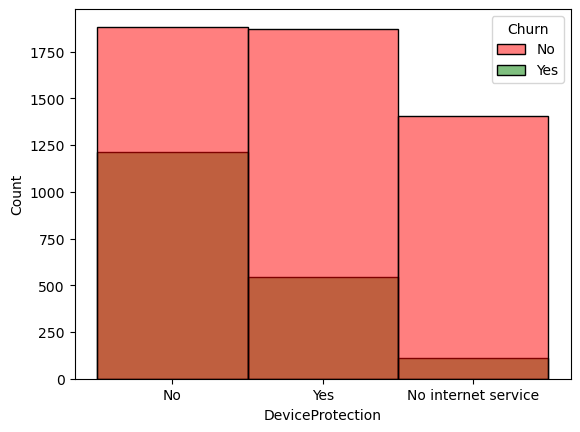

In [270]:
sns.histplot(data=df_cust, x="DeviceProtection",hue = 'Churn',palette = ['red','green'])

When device protection is not present.Customer is likely to churn

<Axes: xlabel='TechSupport', ylabel='Count'>

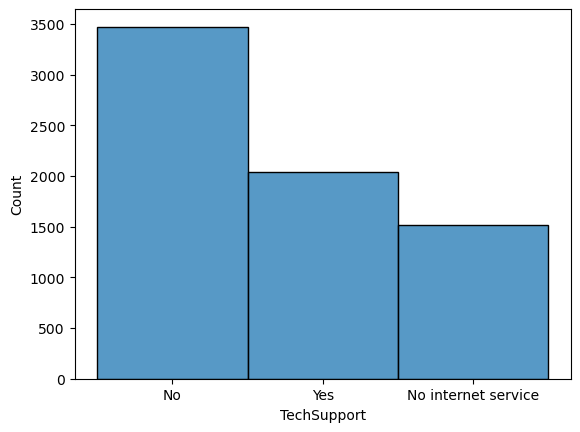

In [271]:
sns.histplot(data=df_cust, x="TechSupport")

In [272]:
df_cust.groupby(['TechSupport','Churn'])['TechSupport','Churn'].value_counts()

TechSupport          Churn
No                   No       2026
                     Yes      1446
No internet service  No       1407
                     Yes       113
Yes                  No       1730
                     Yes       310
dtype: int64

<Axes: xlabel='TechSupport', ylabel='Count'>

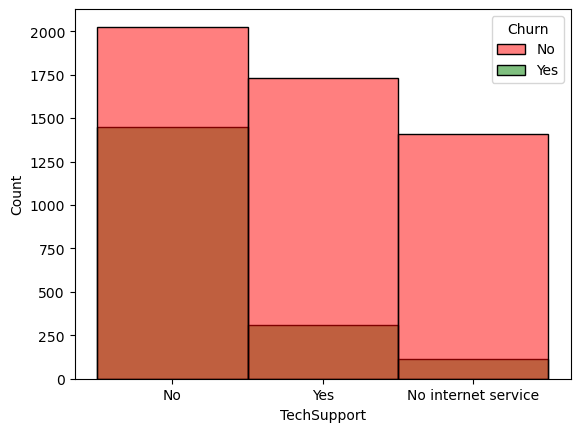

In [273]:
sns.histplot(data=df_cust, x="TechSupport",hue = 'Churn',palette = ['red','green'])

When techsupport is not present.Customer is likely to churn

<Axes: xlabel='StreamingTV', ylabel='Count'>

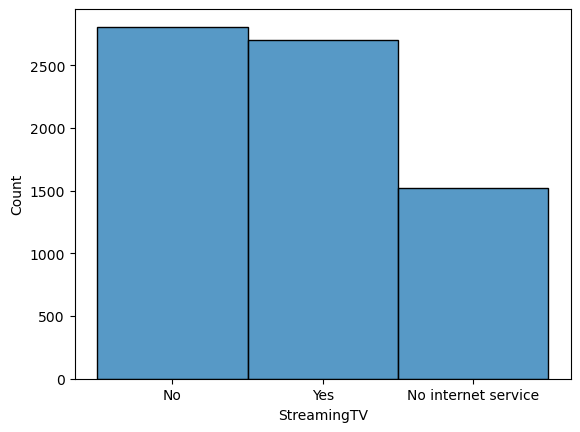

In [274]:
sns.histplot(data=df_cust, x="StreamingTV")

In [275]:
df_cust.groupby(['StreamingTV','Churn'])['StreamingTV','Churn'].value_counts()

StreamingTV          Churn
No                   No       1867
                     Yes       942
No internet service  No       1407
                     Yes       113
Yes                  No       1889
                     Yes       814
dtype: int64

<Axes: xlabel='StreamingTV', ylabel='Count'>

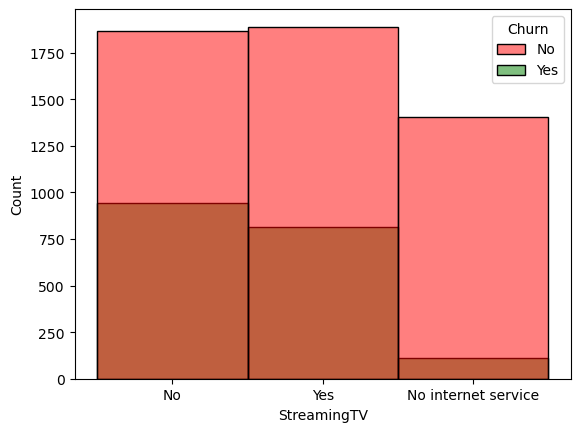

In [276]:
sns.histplot(data=df_cust, x="StreamingTV",hue = 'Churn',palette = ['red','green'])

When StreamingTV is present or not present.Customer is 50% likely to churn i.e there is 50% of chances to churn if there is a streaming TV

<Axes: xlabel='StreamingMovies', ylabel='Count'>

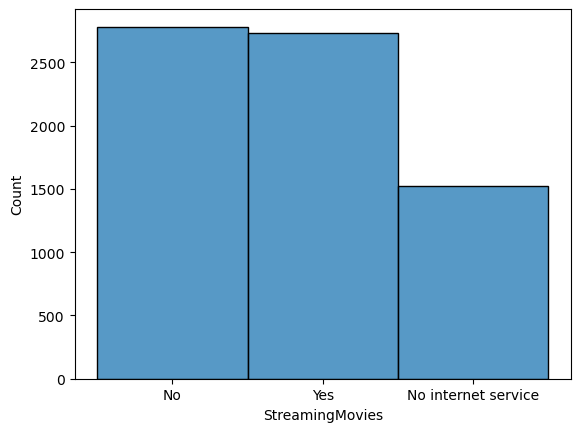

In [277]:
sns.histplot(data=df_cust, x="StreamingMovies")

In [278]:
df_cust.groupby(['StreamingMovies','Churn'])['StreamingMovies','Churn'].value_counts()

StreamingMovies      Churn
No                   No       1843
                     Yes       938
No internet service  No       1407
                     Yes       113
Yes                  No       1913
                     Yes       818
dtype: int64

<Axes: xlabel='StreamingMovies', ylabel='Count'>

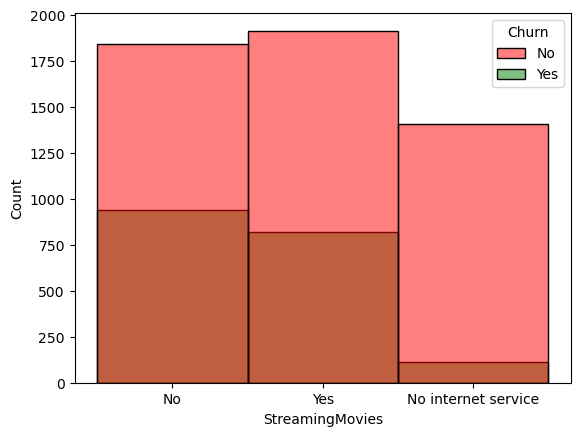

In [279]:
sns.histplot(data=df_cust, x="StreamingMovies",hue = 'Churn',palette = ['red','green'])

When StreamingMovies is present or not present.Customer is 50% likely to churn

<Axes: xlabel='Contract', ylabel='Count'>

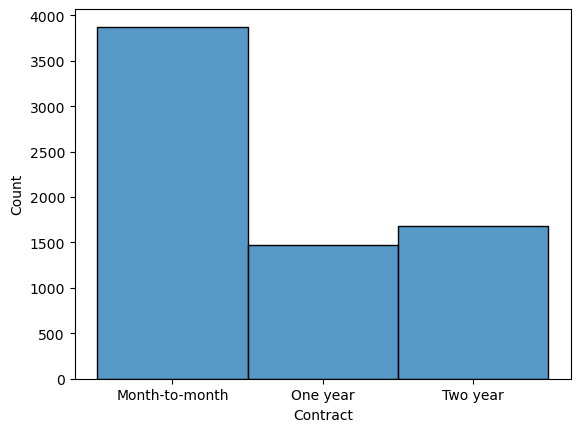

In [280]:
sns.histplot(data=df_cust, x="Contract")

In [281]:
df_cust.groupby(['Contract','Churn'])['Contract','Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
dtype: int64

<Axes: xlabel='Contract', ylabel='Count'>

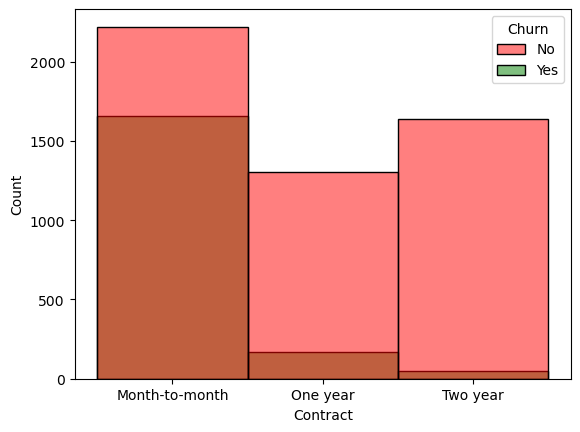

In [282]:
sns.histplot(data=df_cust, x="Contract",hue = 'Churn',palette = ['red','green'])

When it comes to contract people with month to month subscriptions are likely yo churn

<Axes: xlabel='PaperlessBilling', ylabel='Count'>

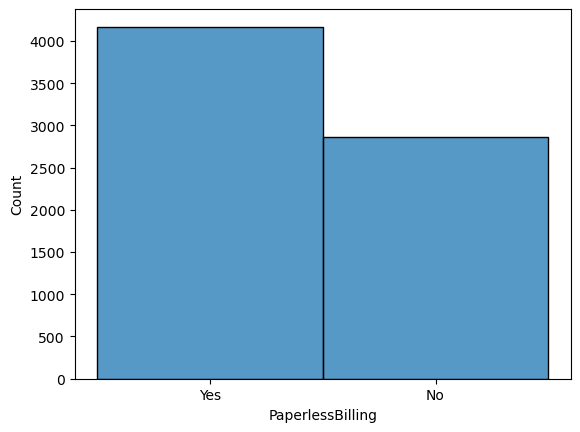

In [283]:
sns.histplot(data=df_cust, x="PaperlessBilling")

In [284]:
df_cust.groupby(['PaperlessBilling','Churn'])['PaperlessBilling','Churn'].value_counts()

PaperlessBilling  Churn
No                No       2395
                  Yes       469
Yes               No       2768
                  Yes      1400
dtype: int64

<Axes: xlabel='PaperlessBilling', ylabel='Count'>

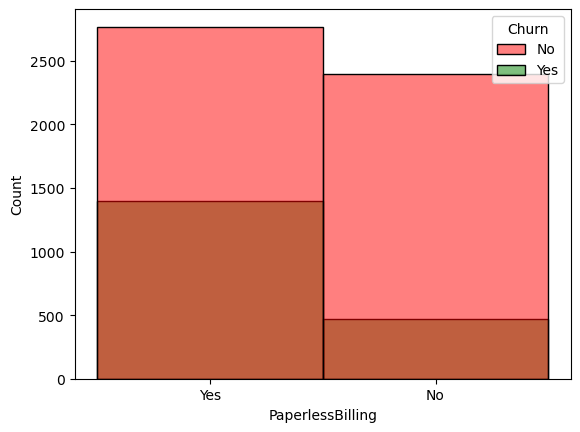

In [285]:
sns.histplot(data=df_cust, x="PaperlessBilling",hue = 'Churn',palette = ['red','green'])

If paper billing is present.Customers are likely to churn

<Axes: xlabel='PaymentMethod', ylabel='Count'>

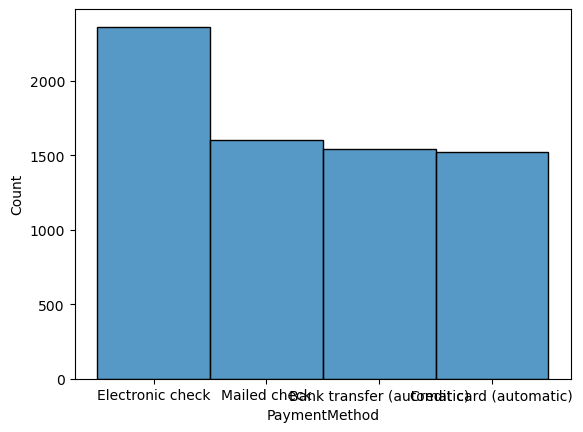

In [286]:
sns.histplot(data=df_cust, x="PaymentMethod")

In [287]:
df_cust.groupby(['PaymentMethod','Churn'])['PaymentMethod','Churn'].value_counts()

PaymentMethod              Churn
Bank transfer (automatic)  No       1284
                           Yes       258
Credit card (automatic)    No       1289
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1296
                           Yes       308
dtype: int64

<Axes: xlabel='PaymentMethod', ylabel='Count'>

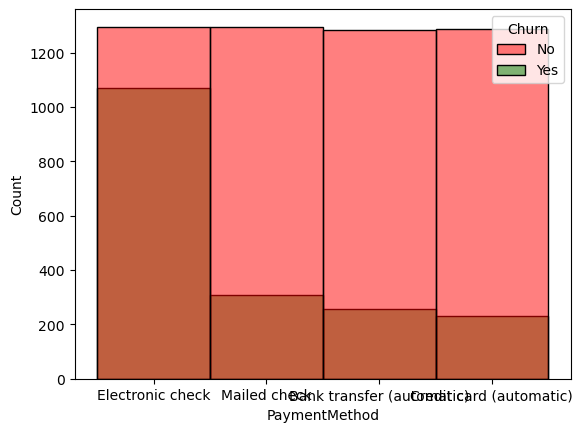

In [288]:
sns.histplot(data=df_cust, x="PaymentMethod",hue = 'Churn',palette = ['red','green'])

If payment method is electronic check.Customers are likely to churn

<Axes: xlabel='PhoneService', ylabel='Count'>

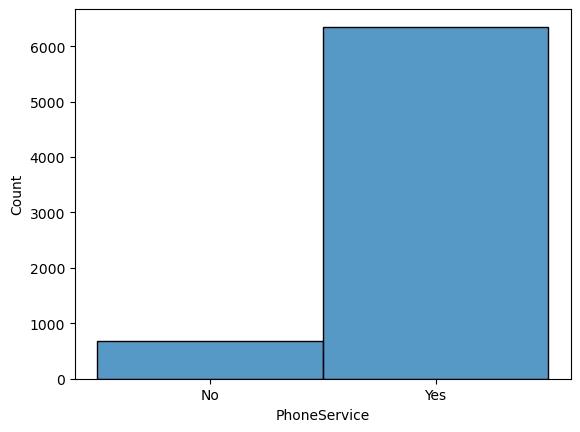

In [289]:
sns.histplot(data=df_cust, x="PhoneService")

In [290]:
df_cust.groupby(['PhoneService','Churn'])['PhoneService','Churn'].value_counts()

PhoneService  Churn
No            No        510
              Yes       170
Yes           No       4653
              Yes      1699
dtype: int64

<Axes: xlabel='PhoneService', ylabel='Count'>

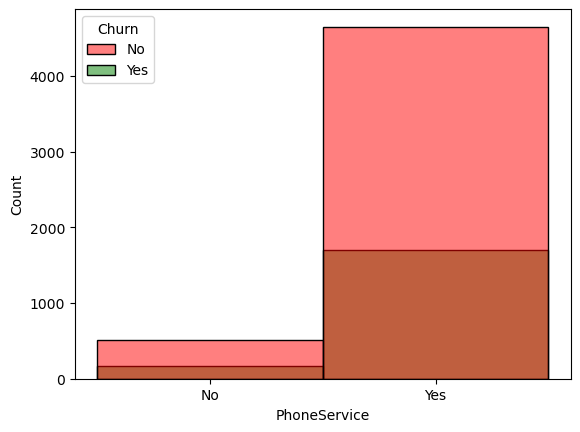

In [291]:
sns.histplot(data=df_cust, x="PhoneService",hue = 'Churn',palette = ['red','green'])

Phone serice doesnot play a major role in deciding who will churn

In [292]:
categorical_df = df_cust.select_dtypes(exclude = np.number)
categorical_independent = categorical_df.drop('Churn',axis = 1)
#categorical_independent

#categorical_df

In [293]:
relationship_exists = {}
relationship_dontexists = {}
for feature in categorical_independent.columns:
    contingency_table = pd.crosstab(categorical_df[feature], categorical_df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    #print("P-value:", p)

    if p<0.05:
        relationship_exists[feature] = p
        #print("Relationship exists between two variables")
    else:
        relationship_dontexists[feature] = p
        #print("Relationship donot exists between two variables")

print("relationship_exists:\n",relationship_exists)
print("relationship_dontexists:\n",relationship_dontexists)

relationship_exists:
 {'SeniorCitizen': 2.4792557203954705e-36, 'Partner': 3.97379757451591e-36, 'Dependents': 2.0196592017051303e-42, 'MultipleLines': 0.0035679273999811405, 'InternetService': 5.831198962237274e-159, 'OnlineSecurity': 1.4006867477839222e-184, 'OnlineBackup': 7.776099238804965e-131, 'DeviceProtection': 1.9593887862403176e-121, 'TechSupport': 7.407807748843711e-180, 'StreamingTV': 1.324641113169159e-81, 'StreamingMovies': 5.353560421401324e-82, 'Contract': 7.326182186265472e-257, 'PaperlessBilling': 8.236203353962564e-58, 'PaymentMethod': 1.4263098511063342e-139}
relationship_dontexists:
 {'gender': 0.4904884707065509, 'PhoneService': 0.34992398942431924}


<Axes: xlabel='Churn', ylabel='tenure'>

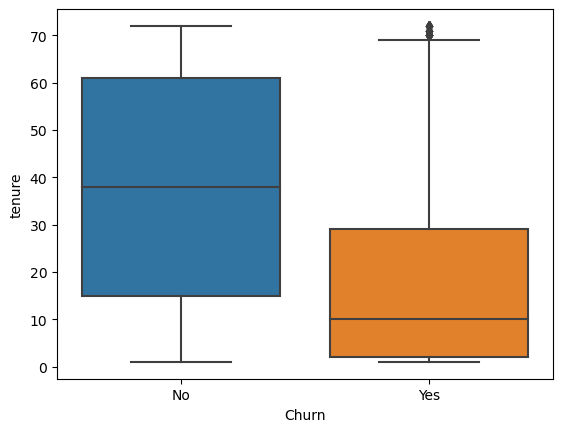

In [294]:
sns.boxplot(x="Churn",y="tenure",data = df_cust)

As we can see from above box graph.People who are having lower tenure and too high tenure are much likely to churn.

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

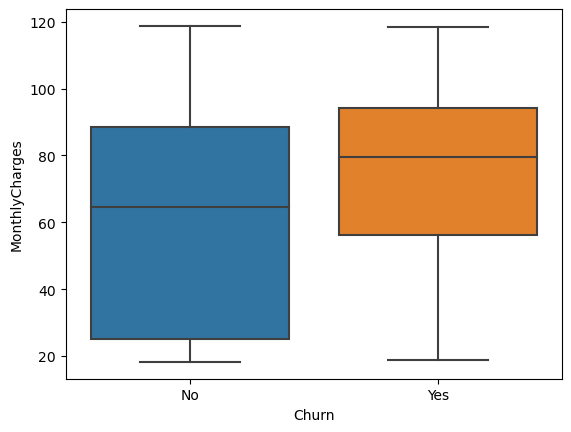

In [295]:
sns.boxplot(x="Churn",y="MonthlyCharges",data = df_cust)

Monthly charge doesnot have major impact on whether people likely to churn or not

<Axes: xlabel='Churn', ylabel='TotalCharges'>

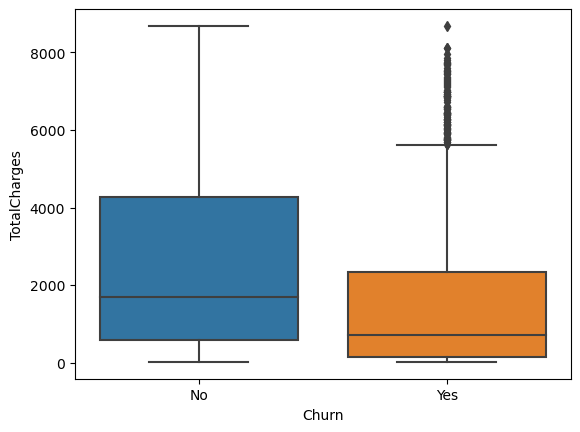

In [296]:
sns.boxplot(x="Churn",y="TotalCharges",data = df_cust)

If total charges are either high above 6000.People are likey to churn

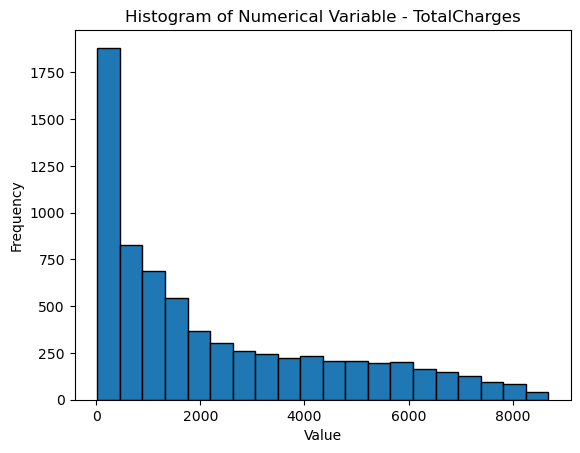

In [297]:
plt.hist(df_cust['TotalCharges'], bins=20, edgecolor='black')
plt.title("Histogram of Numerical Variable - TotalCharges")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

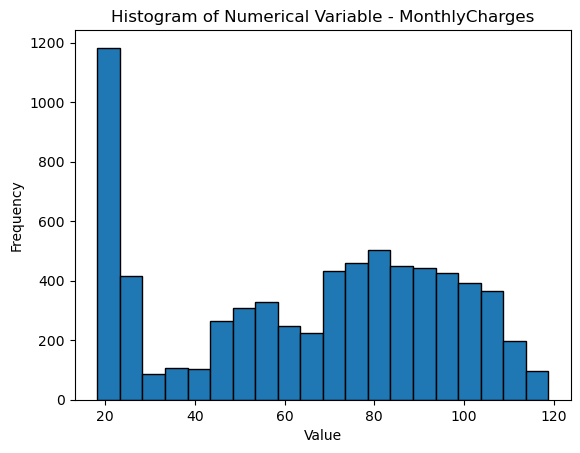

In [298]:
plt.hist(df_cust['MonthlyCharges'], bins=20, edgecolor='black')
plt.title("Histogram of Numerical Variable - MonthlyCharges")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

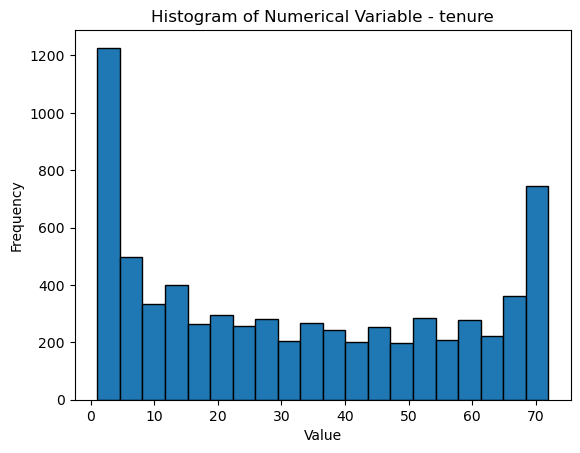

In [299]:
plt.hist(df_cust['tenure'], bins=20, edgecolor='black')
plt.title("Histogram of Numerical Variable - tenure")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [300]:
# Calculate Q1, Q3, and IQR
Q1 = df_cust['tenure'].quantile(0.25)
Q3 = df_cust['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_cust[(df_cust['tenure'] < lower_bound) | (df_cust['tenure'] > upper_bound)]
#print(outliers)
# Calculate percentage of outliers
percentage_outliers = (len(outliers) / len(df_cust)) * 100
print(f"Percentage of outliers: {percentage_outliers:.2f}%")

Percentage of outliers: 0.00%


In [301]:
# Calculate Q1, Q3, and IQR
Q1 = df_cust['TotalCharges'].quantile(0.25)
Q3 = df_cust['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_cust[(df_cust['TotalCharges'] < lower_bound) | (df_cust['TotalCharges'] > upper_bound)]
#print(outliers)

# Calculate percentage of outliers
percentage_outliers = (len(outliers) / len(df_cust)) * 100
print(f"Percentage of outliers: {percentage_outliers:.2f}%")

Percentage of outliers: 0.00%


In [302]:
numerical_df = df_cust.select_dtypes(include = np.number)

numerical_df

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [303]:
numerical_df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


As we can see from above graph.Tenure and total charges having impact on Churn based on box plot.Due to difference in mean and monthly charge dont have higher impact on churn

By checking percentage of outliers.We came to know that there are no outliers.But outliers shown by box plot is just the upper boundary values not really the outliers.

After doing EDA we got to know that streaming tv,streaming movies,gender,phoneservice,multiplelines and monthly charges are columns that dont have any impact on whether customers. Churn or not.Hence,we will remove them 

In [304]:
df_cust.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [305]:
df_cust = df_cust.drop(columns=['gender','PhoneService','StreamingTV','StreamingMovies','MultipleLines','MonthlyCharges'])



In [306]:
df_cust

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,1889.50,No
2,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),1840.75,No
4,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,1990.50,No
7039,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),7362.90,No
7040,0,Yes,Yes,11,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,1,Yes,No,4,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,306.60,Yes


In [307]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   object 
 1   Partner           7032 non-null   object 
 2   Dependents        7032 non-null   object 
 3   tenure            7032 non-null   int64  
 4   InternetService   7032 non-null   object 
 5   OnlineSecurity    7032 non-null   object 
 6   OnlineBackup      7032 non-null   object 
 7   DeviceProtection  7032 non-null   object 
 8   TechSupport       7032 non-null   object 
 9   Contract          7032 non-null   object 
 10  PaperlessBilling  7032 non-null   object 
 11  PaymentMethod     7032 non-null   object 
 12  TotalCharges      7032 non-null   float64
 13  Churn             7032 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 824.1+ KB


In [308]:
df_cust['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [309]:
df_cust['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [310]:
# Lets make SeniorCitizen a categorical column so that we can encode all categorical values at once.

mapping = {0: 'No', 1: 'Yes'}
df_cust['SeniorCitizen'] = df_cust['SeniorCitizen'].map(mapping)

df_cust





,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,No,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,No,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,1889.50,No
2,No,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,No,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),1840.75,No
4,No,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,24,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,1990.50,No
7039,No,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),7362.90,No
7040,No,Yes,Yes,11,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Yes,Yes,No,4,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,306.60,Yes


In [311]:
#minority_class = df_cust[df_cust['Churn'] == 'Yes']
#oversampled_minority = pd.concat([minority_class] * 3, axis=0) 
#balanced_df = pd.concat([df_cust, oversampled_minority], axis=0)

#balanced_df.shape

In [312]:
#balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [313]:
#Split it into dependent and independent variables

X = df_cust.drop('Churn',axis = 1)
y = df_cust['Churn']

In [314]:
X

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,No,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85
1,No,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,1889.50
2,No,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,108.15
3,No,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),1840.75
4,No,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,24,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,1990.50
7039,No,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),7362.90
7040,No,Yes,Yes,11,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,346.45
7041,Yes,Yes,No,4,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,306.60


In [315]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [316]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print("Original class distribution:", Counter(y))
 
# Oversampling using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

print("Oversampled class distribution:", Counter(y_over))

Original class distribution: Counter({'No': 5163, 'Yes': 1869})
Oversampled class distribution: Counter({'No': 5163, 'Yes': 5163})


In [317]:
# Split independent variable into categorical and numerical variable
num_df = X_over.select_dtypes(exclude="object")
cat_df = X_over.select_dtypes(include="object")

cat_df

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,No,Yes,No,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check
1,No,No,No,DSL,Yes,No,Yes,No,One year,No,Mailed check
2,No,No,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check
3,No,No,No,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic)
4,No,No,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...
10321,Yes,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Credit card (automatic)
10322,Yes,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check
10323,No,No,No,Fiber optic,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic)
10324,No,Yes,Yes,DSL,No,No,Yes,Yes,One year,Yes,Mailed check


In [318]:
# Lets do encoding for dependent categorical column

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding

for column in cat_df.columns:
    cat_df[column] = label_encoder.fit_transform(cat_df[column])

cat_df

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,0,2,0,0,0,1,2
1,0,0,0,0,2,0,2,0,1,0,3
2,0,0,0,0,2,2,0,0,0,1,3
3,0,0,0,0,2,0,2,2,1,0,0
4,0,0,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
10321,1,1,0,1,0,0,0,0,0,1,1
10322,1,1,0,1,0,0,0,0,0,1,2
10323,0,0,0,1,2,2,2,0,0,1,1
10324,0,1,1,0,0,0,2,2,1,1,3


In [319]:
X = pd.concat([cat_df,num_df],axis=1)

X

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,tenure,TotalCharges
0,0,1,0,0,0,2,0,0,0,1,2,1,29.85
1,0,0,0,0,2,0,2,0,1,0,3,34,1889.50
2,0,0,0,0,2,2,0,0,0,1,3,2,108.15
3,0,0,0,0,2,0,2,2,1,0,0,45,1840.75
4,0,0,0,1,0,0,0,0,0,1,2,2,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,1,1,0,1,0,0,0,0,0,1,1,32,2483.05
10322,1,1,0,1,0,0,0,0,0,1,2,13,916.75
10323,0,0,0,1,2,2,2,0,0,1,1,67,6886.25
10324,0,1,1,0,0,0,2,2,1,1,3,33,2405.05


In [320]:
X.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
tenure              0
TotalCharges        0
dtype: int64

In [321]:
# Lets do encoding for independent categorical column

mapping = {'No': 0, 'Yes': 1}
y = y_over.map(mapping)

y

0        0
1        0
2        1
3        0
4        1
        ..
10321    1
10322    1
10323    1
10324    1
10325    1
Name: Churn, Length: 10326, dtype: int64

In [322]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8260, 13), (2066, 13), (8260,), (2066,))

In [323]:
type(X_train),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [324]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8260 entries, 9031 to 7270
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     8260 non-null   int32  
 1   Partner           8260 non-null   int32  
 2   Dependents        8260 non-null   int32  
 3   InternetService   8260 non-null   int32  
 4   OnlineSecurity    8260 non-null   int32  
 5   OnlineBackup      8260 non-null   int32  
 6   DeviceProtection  8260 non-null   int32  
 7   TechSupport       8260 non-null   int32  
 8   Contract          8260 non-null   int32  
 9   PaperlessBilling  8260 non-null   int32  
 10  PaymentMethod     8260 non-null   int32  
 11  tenure            8260 non-null   int64  
 12  TotalCharges      8260 non-null   float64
dtypes: float64(1), int32(11), int64(1)
memory usage: 548.5 KB


In [325]:
# Lets do the scaling of Train data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply Standard Scaling
XTrain_num_df = X_train[['tenure','TotalCharges']]
XTrain_cat_df = X_train.drop(columns=['tenure','TotalCharges'],axis=1)

Xtest_num_df = X_test[['tenure','TotalCharges']]
Xtest_cat_df = X_test.drop(columns=['tenure','TotalCharges'],axis=1)

scaled_data = scaler.fit_transform(XTrain_num_df)
scaled_data_test = scaler.transform(Xtest_num_df)

# Convert back to a DataFrame for readability
XTrain_num_df = pd.DataFrame(scaled_data, columns=XTrain_num_df.columns,index = X_train.index)
Xtest_num_df = pd.DataFrame(scaled_data_test, columns=Xtest_num_df.columns, index = X_test.index)

X_train = pd.concat([XTrain_cat_df,XTrain_num_df],axis=1)
X_test = pd.concat([Xtest_cat_df,Xtest_num_df],axis=1)

X_train

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,tenure,TotalCharges
9031,0,0,0,1,0,0,0,2,0,1,2,-0.944723,-0.725847
8100,0,1,1,1,2,0,2,0,0,1,2,-0.444640,-0.229389
8400,1,0,1,1,0,0,0,0,0,1,2,-1.111417,-0.900650
828,0,1,0,1,2,2,0,2,1,0,2,0.930586,1.631667
6964,0,1,1,0,2,2,2,0,2,0,2,-0.152926,-0.220613
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,0,0,2,1,1,1,1,2,0,3,0.430504,-0.596710
5191,0,0,0,1,0,2,2,2,1,1,2,0.972259,1.673974
5390,0,0,0,2,1,1,1,1,1,0,0,0.930586,-0.480989
860,1,1,0,1,0,2,0,0,0,1,2,-0.319620,-0.264108


In [326]:
X_train.shape,X_test.shape

((8260, 13), (2066, 13))

In [327]:
X_test

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,tenure,TotalCharges
4139,0,1,0,1,0,0,0,0,0,1,2,0.305483,0.244531
1692,0,1,1,0,2,2,2,2,2,0,1,1.472342,1.218955
2692,0,1,0,0,2,2,2,2,2,0,0,1.805730,1.976634
7704,0,0,0,2,1,1,1,1,0,0,3,-1.111417,-0.924077
321,0,1,1,0,0,2,2,2,2,1,2,1.847403,1.016062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,1,0,0,1,2,2,0,2,2,1,0,1.847403,2.608079
4528,0,0,0,1,0,0,0,0,0,1,2,-1.111417,-0.901404
8074,1,0,0,1,0,0,0,0,0,1,2,-0.986396,-0.799260
4730,0,0,0,1,0,2,2,0,0,0,3,-0.944723,-0.685391


In [328]:
X_test.isnull().sum(), X_test.shape

(SeniorCitizen       0
 Partner             0
 Dependents          0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 tenure              0
 TotalCharges        0
 dtype: int64,
 (2066, 13))

In [329]:
#from imblearn.over_sampling import RandomOverSampler

#undersampler = RandomOverSampler(sampling_strategy=1.0,random_state=42)
#X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

#X_train.shape, y_train.shape, X_train_resampled.shape,y_train_resampled.shape

#from collections import Counter
#print("Original class distribution:", Counter(y_train))
#print("Resampled class distribution:", Counter(y_resampled))

In [330]:
#y_train_resampled.value_counts()

In [331]:
#from imblearn.combine import SMOTEENN
#from imblearn.over_sampling import SMOTE 


#smotenn = SMOTEENN(smote=SMOTE(sampling_strategy=1.0, k_neighbors=3, random_state=42),random_state=42)
#smote=SMOTE(sampling_strategy=1.0, k_neighbors=3, random_state=42)

#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#X_train.shape, y_train.shape, X_train_resampled.shape,y_train_resampled.shape

#from collections import Counter
#print("Original class distribution:", Counter(y_train))
#print("Resampled class distribution:", Counter(y_train_resampled))

In [332]:
#y_train_resampled.value_counts()

In [333]:
#from imblearn.under_sampling import RandomUnderSampler
#undersampler = RandomUnderSampler(random_state=42)
#X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [334]:
def evaluate_model(true, predicted):
    accuracyscore = accuracy_score(true, predicted)
    classificationreport = classification_report(true, predicted)
    classificationreport_dict = classification_report(true, predicted, output_dict=True)
    confusionmatrix = confusion_matrix(true, predicted)
    return accuracyscore, classificationreport,classificationreport_dict, confusionmatrix

In [335]:
#!pip install catboost

In [336]:
#!pip install lightgbm

#hi how are you

Logistic Regression
Model performance for Training set
- Accuracy score: 
0.7619
- Classification report:
               precision    recall  f1-score   support

           0       0.81      0.69      0.74      4126
           1       0.73      0.84      0.78      4134

    accuracy                           0.76      8260
   macro avg       0.77      0.76      0.76      8260
weighted avg       0.77      0.76      0.76      8260



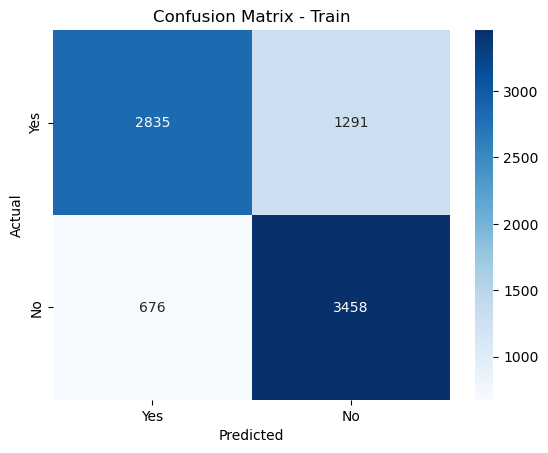

----------------------------------
Model performance for Test set
- Accuracy score: 
0.7507
- Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1037
           1       0.72      0.82      0.77      1029

    accuracy                           0.75      2066
   macro avg       0.76      0.75      0.75      2066
weighted avg       0.76      0.75      0.75      2066



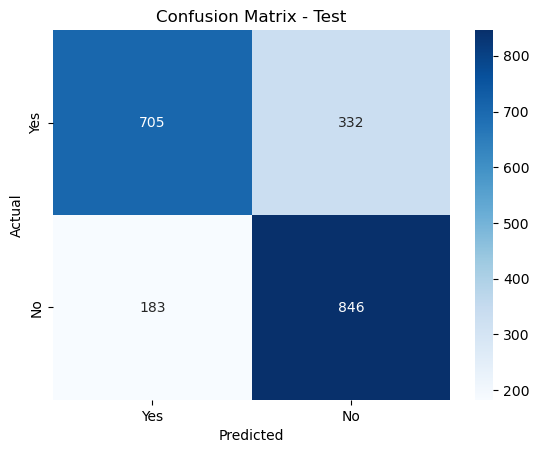



Linear Discriminant Analysis
Model performance for Training set
- Accuracy score: 
0.7557
- Classification report:
               precision    recall  f1-score   support

           0       0.82      0.65      0.73      4126
           1       0.71      0.86      0.78      4134

    accuracy                           0.76      8260
   macro avg       0.77      0.76      0.75      8260
weighted avg       0.77      0.76      0.75      8260



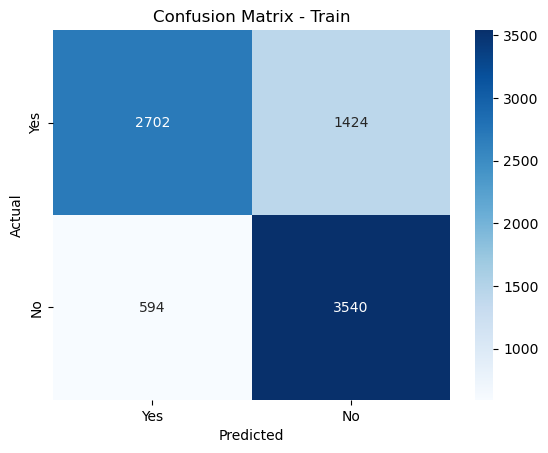

----------------------------------
Model performance for Test set
- Accuracy score: 
0.7498
- Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.66      0.72      1037
           1       0.71      0.84      0.77      1029

    accuracy                           0.75      2066
   macro avg       0.76      0.75      0.75      2066
weighted avg       0.76      0.75      0.75      2066



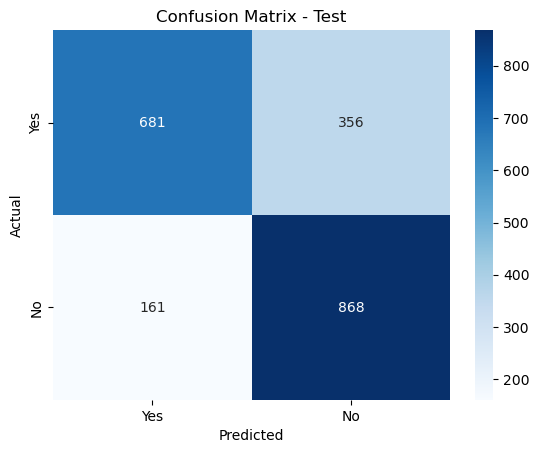



Decision Tree Classifier
Model performance for Training set
- Accuracy score: 
0.8985
- Classification report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      4126
           1       0.86      0.95      0.90      4134

    accuracy                           0.90      8260
   macro avg       0.90      0.90      0.90      8260
weighted avg       0.90      0.90      0.90      8260



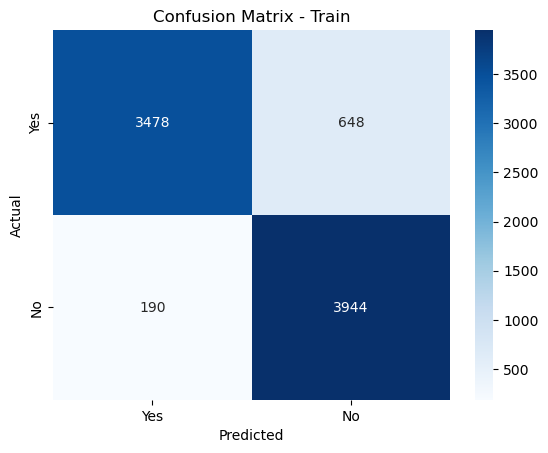

----------------------------------
Model performance for Test set
- Accuracy score: 
0.8195
- Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1037
           1       0.77      0.91      0.83      1029

    accuracy                           0.82      2066
   macro avg       0.83      0.82      0.82      2066
weighted avg       0.83      0.82      0.82      2066



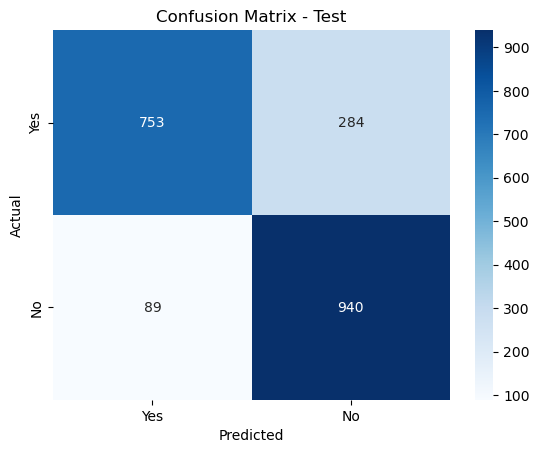



RandomForest Classifier
Model performance for Training set
- Accuracy score: 
0.9145
- Classification report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      4126
           1       0.87      0.98      0.92      4134

    accuracy                           0.91      8260
   macro avg       0.92      0.91      0.91      8260
weighted avg       0.92      0.91      0.91      8260



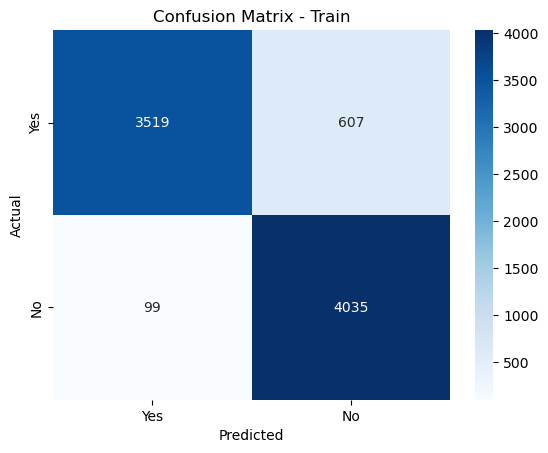

----------------------------------
Model performance for Test set
- Accuracy score: 
0.8514
- Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1037
           1       0.80      0.93      0.86      1029

    accuracy                           0.85      2066
   macro avg       0.86      0.85      0.85      2066
weighted avg       0.86      0.85      0.85      2066



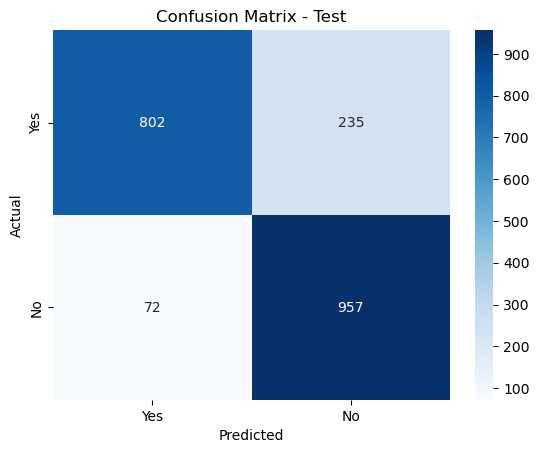



CatBoost Classifier
Model performance for Training set
- Accuracy score: 
0.9080
- Classification report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90      4126
           1       0.84      1.00      0.92      4134

    accuracy                           0.91      8260
   macro avg       0.92      0.91      0.91      8260
weighted avg       0.92      0.91      0.91      8260



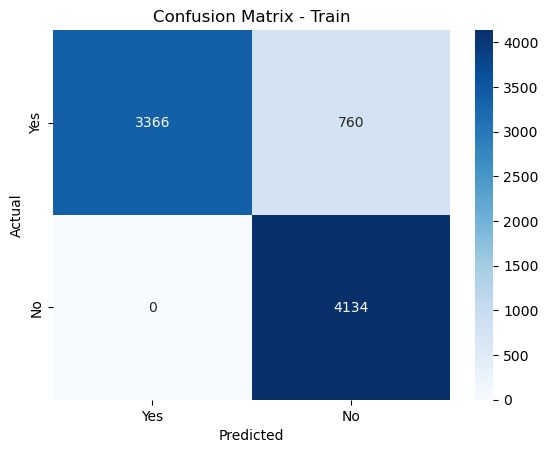

----------------------------------
Model performance for Test set
- Accuracy score: 
0.8330
- Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.69      0.81      1037
           1       0.76      0.98      0.85      1029

    accuracy                           0.83      2066
   macro avg       0.86      0.83      0.83      2066
weighted avg       0.86      0.83      0.83      2066



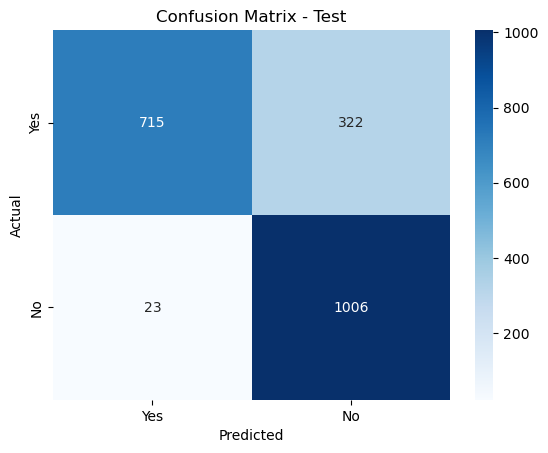



SVM Classifier
Model performance for Training set
- Accuracy score: 
0.8672
- Classification report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.86      4126
           1       0.82      0.94      0.88      4134

    accuracy                           0.87      8260
   macro avg       0.88      0.87      0.87      8260
weighted avg       0.87      0.87      0.87      8260



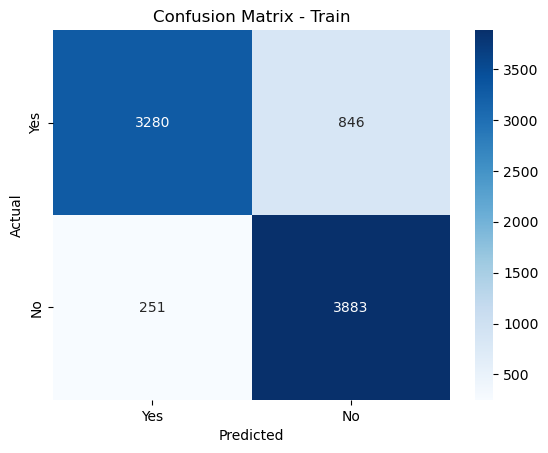

----------------------------------
Model performance for Test set
- Accuracy score: 
0.8098
- Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1037
           1       0.76      0.91      0.83      1029

    accuracy                           0.81      2066
   macro avg       0.82      0.81      0.81      2066
weighted avg       0.82      0.81      0.81      2066



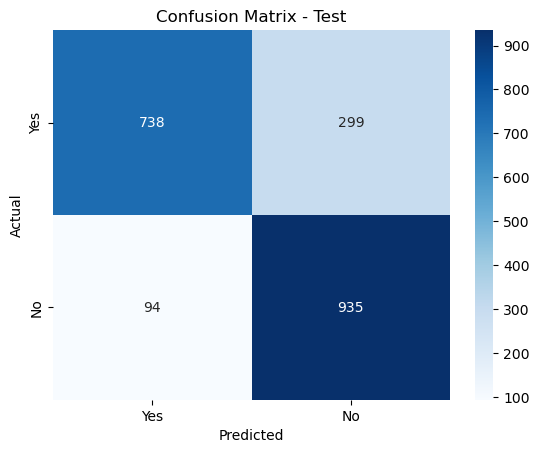



KNeighbors Classifier
Model performance for Training set
- Accuracy score: 
0.9978
- Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4126
           1       1.00      1.00      1.00      4134

    accuracy                           1.00      8260
   macro avg       1.00      1.00      1.00      8260
weighted avg       1.00      1.00      1.00      8260



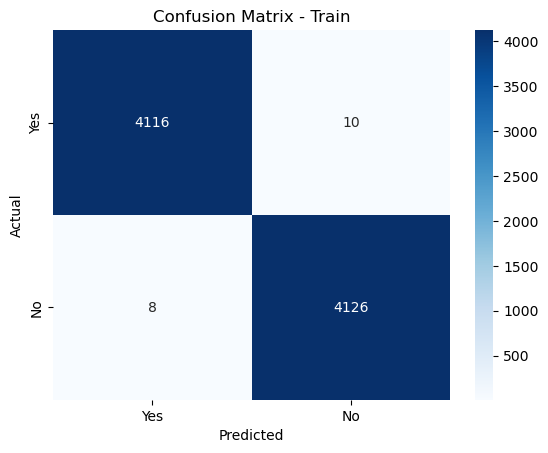

----------------------------------
Model performance for Test set
- Accuracy score: 
0.8224
- Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1037
           1       0.76      0.95      0.84      1029

    accuracy                           0.82      2066
   macro avg       0.84      0.82      0.82      2066
weighted avg       0.85      0.82      0.82      2066



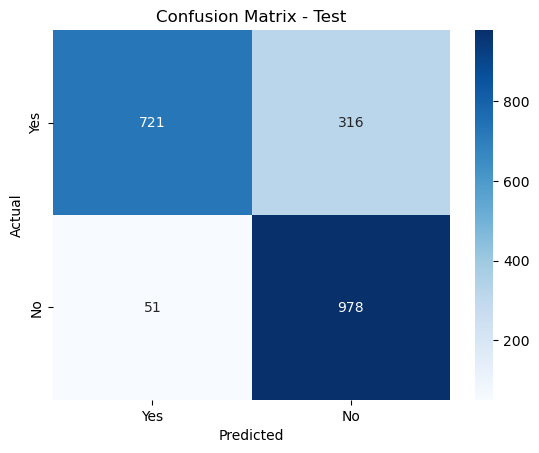

'\nfor name, model in models.items():\n    param_grid = param_grids[name]\n    gs = GridSearchCV(model, param_grid, cv=3)\n    gs.fit(X_train_resampled, y_train_resampled)\n    print(f"{name} Best Parameters: {gs.best_params_}")\n    best_estimators.append((name, gs.best_estimator_))\n    #print("Name",name)\n\nstacking_clf = StackingClassifier(\n    estimators=best_estimators,\n    final_estimator = LogisticRegression(class_weight = "balanced", random_state = 42),\n    cv = 5\n)\n\nstacking_clf.fit(X_train_resampled,y_train_resampled)\n\ny_pred_train = stacking_clf.predict(X_train_resampled)\ny_pred = stacking_clf.predict(X_test)\n\n# Step 6: Evaluate the Stacking Classifier\nprint("Stacking Classifier Accuracy for train:", accuracy_score(y_train_resampled, y_pred_train))\nprint("Classification Report for train:\n", classification_report(y_train_resampled, y_pred_train))\nprint("\n*************************************************************************************\n")\nprint("Stackin

In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "RandomForest Classifier": RandomForestClassifier(random_state=42),
    
    #"XGB Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    #"LGBM Classifier": lgb.LGBMClassifier(random_state=42),
    "CatBoost Classifier": CatBoostClassifier(verbose=0, random_state=42), 
    "SVM Classifier": SVC(kernel='linear', random_state=42),
    "KNeighbors Classifier": KNeighborsClassifier()
    
}

param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['saga'],
        'class_weight' : ['balanced']
    },
    "Linear Discriminant Analysis": {
        'solver': ['svd', 'lsqr', 'eigen'],
        'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]  # Only valid for 'lsqr' or 'eigen'
    },
    "Decision Tree Classifier": {
        'criterion': ['gini', 'entropy'],
        'class_weight' : ['balanced'],
        'max_depth': [3, 5, 10,12],
        'min_samples_split': [1, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'ccp_alpha': [0.0, 0.01, 0.1]
    },
    "RandomForest Classifier": {
        'n_estimators': [20,30,50, 100],
        'max_depth': [3, 5,11],
        'min_samples_split': [1, 5, 11],
        'min_samples_leaf': [1, 2, 5],
        'class_weight' : ['balanced', 'balanced_subsample']
    },
    
    #"XGB Classifier": {
    #    'n_estimators': [50, 100, 200],
    #    'max_depth': [3, 5, 7],
    #    'learning_rate': [0.01, 0.1, 0.2],
    #    'subsample': [0.6, 0.8, 1.0],
    #    'colsample_bytree': [0.6, 0.8, 1.0],
    #    'scale_pos_weight': [1, 10, 50] 
    #},
    
    #"LGBM Classifier": {
    #    'n_estimators': [50, 100, 200],
    #    'num_leaves': [31, 50, 100],
    #    'max_depth': [-1, 10, 20],
    #    'learning_rate': [0.01, 0.1, 0.2],
    #    'is_unbalance': [True, False],  
    #    'scale_pos_weight': [1, 10, 50]
    #},
    "CatBoost Classifier": {
        'iterations': [100,150,200, 230],
        'depth': [4, 6, 9],
        'learning_rate': [0.01, 0.1,0.2],
        'class_weights': [[1, 5], [1, 10], [1, 20]] 
    },
    
    "SVM Classifier": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'class_weight': ['balanced']
    },
    "KNeighbors Classifier": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    
}

model_list = []
f1score_list =[]
best_estimators = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    para = param_grids[list(models.keys())[i]]
    #model.fit(X_train, y_train) # Train model
    
    #print(model)
    gs = GridSearchCV(model,para,cv=3)
    gs.fit(X_train,y_train)
    
    model.set_params(**gs.best_params_)
    model.fit(X_train,y_train)
    
    #best_estimators.append((model, gs.best_estimator_))

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracyscore , model_train_classificationreport,classificationreport_train_dict,model_train_confusionmatrix  = evaluate_model(y_train, y_train_pred)

    model_test_accuracyscore , model_test_classificationreport,classificationreport_test_dict,model_test_confusionmatrix = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
    print('Model performance for Training set')
    print("- Accuracy score: \n{:.4f}".format(model_train_accuracyscore))
    print("- Classification report:\n {}".format(model_train_classificationreport))
    sns.heatmap(model_train_confusionmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Yes", "No"], yticklabels=["Yes", "No"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Train')
    plt.show()

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy score: \n{:.4f}".format(model_test_accuracyscore))
    print("- Classification report: \n{}".format(model_test_classificationreport))
    sns.heatmap(model_test_confusionmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Yes", "No"], yticklabels=["Yes", "No"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Test')
    plt.show()
    
    
    f1score_list.append(classificationreport_test_dict['weighted avg']['f1-score'])
    print('='*50)
    print('\n')
'''
for name, model in models.items():
    param_grid = param_grids[name]
    gs = GridSearchCV(model, param_grid, cv=3)
    gs.fit(X_train_resampled, y_train_resampled)
    print(f"{name} Best Parameters: {gs.best_params_}")
    best_estimators.append((name, gs.best_estimator_))
    #print("Name",name)

stacking_clf = StackingClassifier(
    estimators=best_estimators,
    final_estimator = LogisticRegression(class_weight = "balanced", random_state = 42),
    cv = 5
)

stacking_clf.fit(X_train_resampled,y_train_resampled)

y_pred_train = stacking_clf.predict(X_train_resampled)
y_pred = stacking_clf.predict(X_test)

# Step 6: Evaluate the Stacking Classifier
print("Stacking Classifier Accuracy for train:", accuracy_score(y_train_resampled, y_pred_train))
print("Classification Report for train:\n", classification_report(y_train_resampled, y_pred_train))
print("\n*************************************************************************************\n")
print("Stacking Classifier Accuracy for test:", accuracy_score(y_test, y_pred))
print("Classification Report for test:\n", classification_report(y_test, y_pred))

'''

In [342]:
f1score_list

[0.7494933638479366,
 0.7476024842396229,
 0.8179027594223973,
 0.8505191373060845,
 0.829537726709157,
 0.8079610438422151,
 0.8194831497031219]

In [343]:
model_list

['Logistic Regression',
 'Linear Discriminant Analysis',
 'Decision Tree Classifier',
 'RandomForest Classifier',
 'CatBoost Classifier',
 'SVM Classifier',
 'KNeighbors Classifier']

In [344]:
model_dict = {}

for i in range(0,len(model_list)):
    model_dict[model_list[i]] = f1score_list[i]

model_dict

{'Logistic Regression': 0.7494933638479366,
 'Linear Discriminant Analysis': 0.7476024842396229,
 'Decision Tree Classifier': 0.8179027594223973,
 'RandomForest Classifier': 0.8505191373060845,
 'CatBoost Classifier': 0.829537726709157,
 'SVM Classifier': 0.8079610438422151,
 'KNeighbors Classifier': 0.8194831497031219}

In [345]:
best_model_score = max(sorted(model_dict.values()))
            
#To get best model name from dictionary
best_model_name = list(model_dict.keys())[list(model_dict.values()).index(best_model_score)]
            
best_model = models[best_model_name]

#best_model_score,best_model_name
best_model

RandomForestClassifier(class_weight='balanced_subsample', max_depth=11,
                       min_samples_split=1, random_state=42)

In [347]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

model_train_accuracyscore , model_train_classificationreport,classificationreport_train_dict,model_train_confusionmatrix  = evaluate_model(y_train, y_train_pred)

model_test_accuracyscore , model_test_classificationreport,classificationreport_test_dict,model_test_confusionmatrix = evaluate_model(y_test, y_test_pred)


print(" model_train_classificationreport\n",model_train_classificationreport)
print("**************************************************************************************************")
print(" model_test_classificationreport\n",model_test_classificationreport)

 model_train_classificationreport
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      4126
           1       0.87      0.98      0.92      4134

    accuracy                           0.91      8260
   macro avg       0.92      0.91      0.91      8260
weighted avg       0.92      0.91      0.91      8260

**************************************************************************************************
 model_test_classificationreport
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      1037
           1       0.80      0.93      0.86      1029

    accuracy                           0.85      2066
   macro avg       0.86      0.85      0.85      2066
weighted avg       0.86      0.85      0.85      2066



AUC: 0.92
fpr: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.64320154e-04 9.64320154e-04 9.64320154e-04
 1.92864031e-03 1.92864031e-03 1.92864031e-03 2.89296046e-03
 2.89296046e-03 3.85728062e-03 3.85728062e-03 3.85728062e-03
 3.85728062e-03 3.85728062e-03 3.85728062e-03 3.85728062e-03
 3.85728062e-03 3.85728062e-03 4.82160077e-03 4.82160077e-03
 4.82160077e-03 4.82160077e-03 4.82160077e-03 4.82160077e-03
 4.82160077e-03 4.82160077e-03 4.82160077e-03 4.82160077e-03
 4.82160077e-03 4.82160077e-03 4.82160077e-03 4.82160077e-03
 4.82160077e-03 4.82160077e-03 4.82160077e-03 4.82160077e-03
 4.82160077e-03 4.82160077e-03 5.78592093e-03 5.78592093e-03
 5.78592093e-03 5.78592093e-03 5.78592093e-03 5.78592093e-03
 5.78592093e-03 5.78592093e-03 6.75024108e-03 6.75024108e-03
 6.75024108e-03 6.75024108e-03 6.75024108e-03 6.75024108e-03
 7.71456123e-03 7.71456123e-03 8.67888139e-03 8.67888139e-03
 8.678881

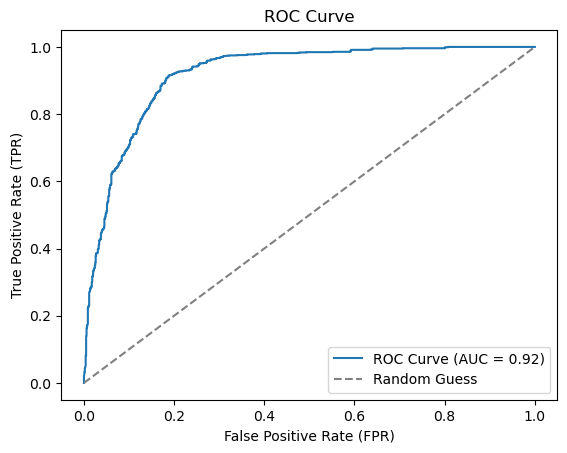

In [351]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = best_model.predict_proba(X_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc_score:.2f}")
print("fpr:",fpr)
print("tpr:",tpr)
print("thresholds:",thresholds)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [352]:
optimal_idx = np.argmax(0.9-0.2)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

Optimal Threshold: 1.97


In [353]:
specificity = 1 - fpr
youden_j = tpr + specificity - 1

# Find the threshold with the maximum Youden's J
max_j_index = np.argmax(youden_j)
optimal_threshold = thresholds[max_j_index]
optimal_j = youden_j[max_j_index]

# Print results
print(f"AUC: {auc_score:.2f}")
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Maximum Youden's J: {optimal_j:.2f}")

AUC: 0.92
Optimal Threshold: 0.54
Maximum Youden's J: 0.73


In [ ]:
Hi how are you

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'class_weight' : ['balanced'],
    'max_depth': [3, 5, 10,12],
    'min_samples_split': [1, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'ccp_alpha': [0.0, 0.01, 0.1]
}
clf = GridSearchCV(estimator = dt, param_grid = param_grid, cv=5,scoring='f1_weighted', n_jobs=-1)
clf.fit(X_train, y_train)

best_model = clf.best_estimator_

print("Best Parameters:", clf.best_params_)
print("\nBest Decision Tree Model:\n", best_model)
# Evaluate on Training Data
y_train_pred = best_model.predict(X_train)
print("\nTraining Set Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
# Evaluate on Test Data
y_test_pred = best_model.predict(X_test)
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


In [ ]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [20,30,50, 100],
    'max_depth': [3, 5,11],
    'min_samples_split': [1, 5, 11],
    'min_samples_leaf': [1, 2, 5],
    'class_weight' : ['balanced', 'balanced_subsample']
}
clf = GridSearchCV(estimator = rf, param_grid = param_grid, cv=5,scoring='f1_weighted', n_jobs=-1)
clf.fit(X_train, y_train)

best_model = clf.best_estimator_

print("Best Parameters:", clf.best_params_)
print("\nBest RandomForest Tree Model:\n", best_model)

# Evaluate on Training Data
y_train_pred = best_model.predict(X_train)
print("\nTraining Set Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Evaluate on Test Data
y_test_pred = best_model.predict(X_test)
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


In [ ]:
cb = CatBoostClassifier(verbose=0, random_state=42)

param_grid = {
    'iterations': [100,150,200, 230],
    'depth': [4, 6, 9],
    'learning_rate': [0.01, 0.1,0.2],
    'class_weights': [[1, 5], [1, 10], [1, 20]] 
}
clf = GridSearchCV(estimator = cb, param_grid = param_grid, cv=5,scoring='f1_weighted', n_jobs=-1)
clf.fit(X_train, y_train)

best_model = clf.best_estimator_

print("Best Parameters:", clf.best_params_)
print("\nBest catboost classifier Tree Model:\n", best_model)

# Evaluate on Training Data
y_train_pred = best_model.predict(X_train)
print("\nTraining Set Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Evaluate on Test Data
y_test_pred = best_model.predict(X_test)
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


In [354]:
df_cust['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64